In [1]:
#import
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from rasterio import merge


In [2]:
#To get two images
mosaic =[]

In [3]:
#Load images 
mul_img = ('E:/Company/KAVOSHGARAN/Virtual Irrigation/Image/Spot_Mosaic/image_1.tif','E:/Company/KAVOSHGARAN/Virtual Irrigation/Image/Spot_Mosaic/image_2.tif')
result_path = "C:/Users/Lenovo/PycharmProjects/Virtual-Irrigation/mosaic/images/mosaic.tif"

In [4]:
#To get eath image
for fp in mul_img:
    src = rio.open(fp)
    mosaic.append(src)

In [5]:
#To get image profile
mos_meta = src.meta.copy()

In [6]:
mos_meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 9346,
 'height': 7884,
 'count': 1,
 'crs': CRS.from_epsg(32638),
 'transform': Affine(10.0, 0.0, 558940.0,
        0.0, -10.0, 4229210.0)}

In [7]:
#To mosaic two pictures
mos_img , mos_transfor = rio.merge.merge(mosaic)
#To update picture profile
mos_meta.update({'driver': 'GTiff','height': mos_img.shape[1],
 'width': mos_img.shape[2],
 'crs': src.crs,
 'transform': mos_transfor})

In [8]:
mos_meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 14110,
 'height': 7884,
 'count': 1,
 'crs': CRS.from_epsg(32638),
 'transform': Affine(10.0, 0.0, 511303.37866355,
        0.0, -10.0, 4229210.0)}

In [9]:
#To write image mosaic
with rio.open( result_path , 'w', **mos_meta )as des:
    des.write( mos_img ) 

D:\Program Files\Anaconda\Run\envs\am_keras_tf\lib\site-packages\PIL\Image.py:2911: DecompressionBombWarning: Image size (111243240 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


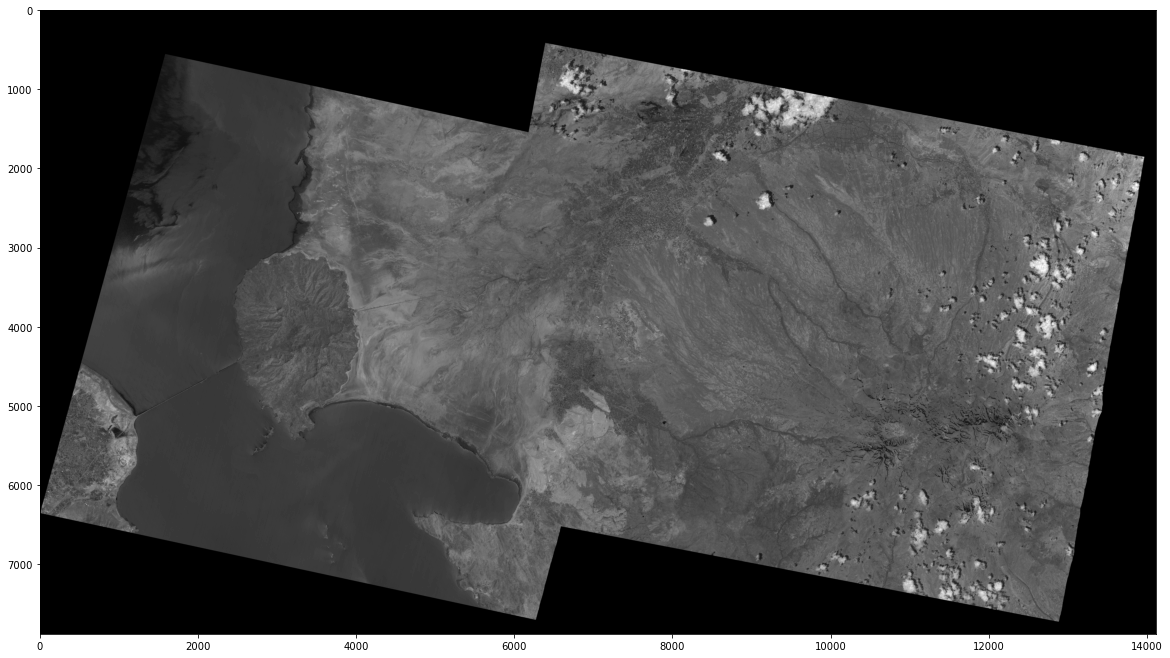

In [10]:
#Denonstrate
image_result= plt.imread("C:/Users/Lenovo/PycharmProjects/Virtual-Irrigation/mosaic/images/mosaic.tif")
plt.figure(figsize=(20, 20))
plt.imshow(image_result , cmap='gray')
plt.savefig('C:/Users/Lenovo/PycharmProjects/Virtual-Irrigation/mosaic/images/resualt.png')
plt.show()